<a href="https://colab.research.google.com/github/Projects-Analysis/House-Rent-Prediction-with-Machine-Learning/blob/main/House_Rent_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Glossary (Column-Wise)

* BHK: Number of Bedrooms, Hall, Kitchen.

* Rent: Rent of the Houses/Apartments/Flats.

* Size: Size of the Houses/Apartments/Flats in Square Feet.

* Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

* Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

* Area Locality: Locality of the Houses/Apartments/Flats.

* City: City where the Houses/Apartments/Flats are Located.

* Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

* Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

* Bathroom: Number of Bathrooms.

* Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.


# Importing the Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')


# Reading  the Dataset into Python

In [2]:
house_rent = pd.read_csv("House_Rent_Dataset.csv")

# Let's have an insight into the Dataset

In [3]:
house_rent.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


# Getting to know the Number of Columns and Rows

In [4]:
house_rent.shape

(4746, 12)

# Let's check if Duplicates and Null Values exist in the Dataset

In [5]:
house_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
house_rent.duplicated().sum()

0

In [7]:
house_rent.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

# Statistical View of the Dataset

In [8]:
house_rent.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [9]:
print(f"The Mean Rent = {house_rent.Rent.mean()}")
print(f"The Median Rent = {house_rent.Rent.median()}")
print(f"The Highest Rent = {house_rent.Rent.max()}")
print(f"The Lowest Rent = {house_rent.Rent.min()}")
# print(f"The Range Rent = {house_rent.Rent.range()}")


The Mean Rent = 34993.45132743363
The Median Rent = 16000.0
The Highest Rent = 3500000
The Lowest Rent = 1200


In [10]:
house_rent.corr()

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


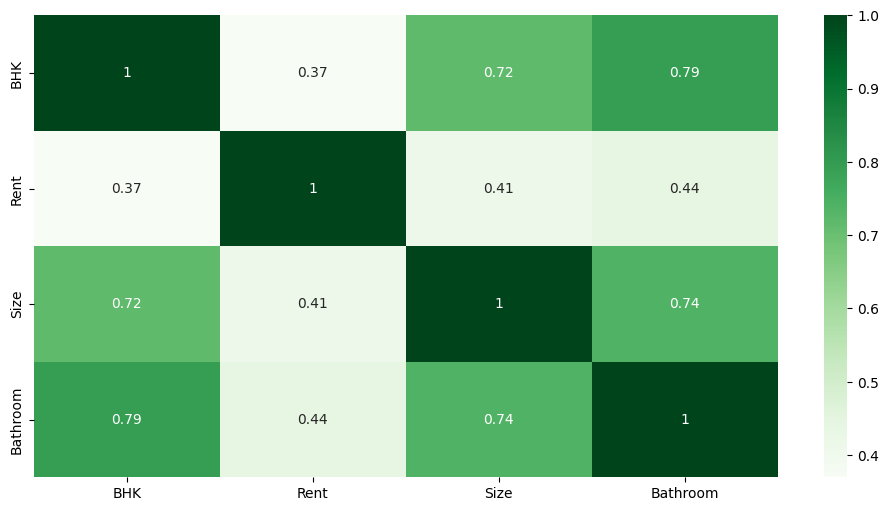

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(house_rent.corr(),annot=True,cmap='Greens')
plt.show()


# Furnishing Status of the available Houses for Rent

In [12]:
fs_count = house_rent['Furnishing Status'].value_counts()
px.pie(labels=fs_count.index.tolist(),
       values=fs_count.tolist(), names=fs_count.index, hole=0.4,
       title='Furnishing Status of the Houses')

# Let's take a Look at the Type of Tenants Preferred in the available Houses

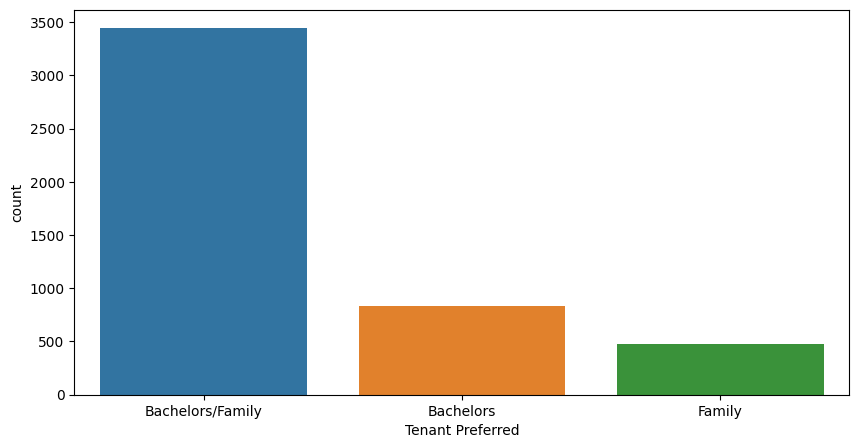

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='Tenant Preferred',data=house_rent)
plt.show()

# Number of Houses available for Rent in Different Cities

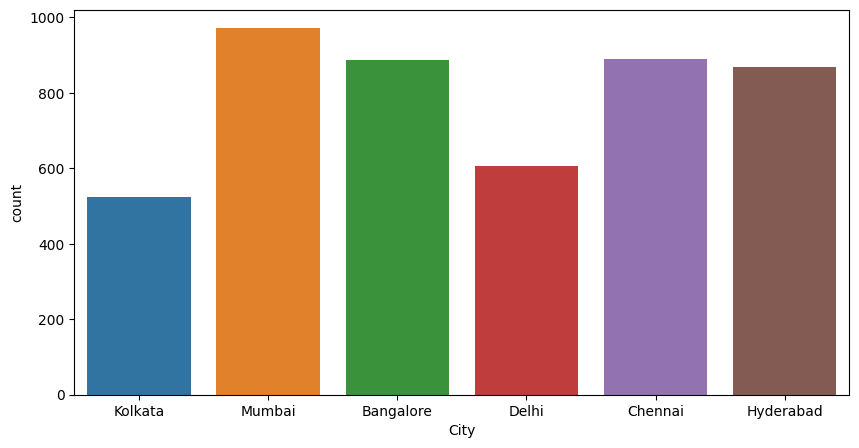

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='City',data=house_rent)
plt.show()

# Converting Categorical Features into Numerical Features

In [15]:
house_rent["Area Type"] = house_rent["Area Type"].map({"Super Area": 1,
                                           "Carpet Area": 2,
                                           "Built Area": 3})
house_rent["City"] = house_rent["City"].map({"Mumbai": 4000, "Chennai": 6000,
                                 "Bangalore": 5600, "Hyderabad": 5000,
                                 "Delhi": 1100, "Kolkata": 7000})
house_rent["Furnishing Status"] = house_rent["Furnishing Status"].map({"Unfurnished": 0,
                                                           "Semi-Furnished": 1,
                                                           "Furnished": 2})
house_rent["Tenant Preferred"] = house_rent["Tenant Preferred"].map({"Bachelors/Family": 2,
                                                         "Bachelors": 1,
                                                         "Family": 3})
house_rent["Point of Contact"] = house_rent["Point of Contact"].map({"Contact Owner": 0,
                                                         "Contact Agent": 1,
                                                         "Contact Builder": 2})

In [16]:
house_rent

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,1,Bandel,7000,0,2,2,0
1,2022-05-13,2,20000,800,1 out of 3,1,"Phool Bagan, Kankurgachi",7000,1,2,1,0
2,2022-05-16,2,17000,1000,1 out of 3,1,Salt Lake City Sector 2,7000,1,2,1,0
3,2022-07-04,2,10000,800,1 out of 2,1,Dumdum Park,7000,0,2,1,0
4,2022-05-09,2,7500,850,1 out of 2,2,South Dum Dum,7000,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,2,Bandam Kommu,5000,1,2,2,0
4742,2022-05-15,3,29000,2000,1 out of 4,1,"Manikonda, Hyderabad",5000,1,2,3,0
4743,2022-07-10,3,35000,1750,3 out of 5,2,"Himayath Nagar, NH 7",5000,1,2,3,1
4744,2022-07-06,3,45000,1500,23 out of 34,2,Gachibowli,5000,1,3,2,1


## Splitting the Data into Training Data and Testing Data

In [17]:
from sklearn.model_selection import train_test_split
x = np.array(house_rent[["BHK", "Size", "Area Type", "City",
                   "Furnishing Status", "Tenant Preferred",
                   "Bathroom", "Point of Contact"]])
y = np.array(house_rent[["Rent"]])

xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.10,
                                                random_state=42)

# Prediction Model

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=21)

Epoch 1/21
4271/4271 [==============================] - 54s 11ms/step - loss: 7050391040.0000
Epoch 2/21
4271/4271 [==============================] - 37s 9ms/step - loss: 6462580224.0000
Epoch 3/21
4271/4271 [==============================] - 38s 9ms/step - loss: 6164906496.0000
Epoch 4/21
4271/4271 [==============================] - 39s 9ms/step - loss: 5961390080.0000
Epoch 5/21
4271/4271 [==============================] - 38s 9ms/step - loss: 5742422528.0000
Epoch 6/21
4271/4271 [==============================] - 37s 9ms/step - loss: 5549998080.0000
Epoch 7/21
4271/4271 [==============================] - 37s 9ms/step - loss: 5302955008.0000
Epoch 8/21
4271/4271 [==============================] - 38s 9ms/step - loss: 5289416192.0000
Epoch 9/21
4271/4271 [==============================] - 45s 11ms/step - loss: 5066248704.0000
Epoch 10/21
4271/4271 [==============================] - 47s 11ms/step - loss: 5003296768.0000
Epoch 11/21
4271/4271 [==============================] - 46s 11ms/

# 1st Prediction

In [22]:
print("Enter House Details to Predict Rent")
a = int(input("Number of BHK: "))
b = int(input("Size of the House: "))
c = int(input("Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): "))
d = int(input("Pin Code of the City: "))
e = int(input("Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): "))
f = int(input("Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): "))
g = int(input("Number of bathrooms: "))
h = int(input("Point of Contact (Contact Owner = 0, Contact Agent = 1, Contact Builder = 2):"))
features = np.array([[a, b, c, d, e, f, g, h]])
print("Predicted House Price = ", model.predict(features))


Enter House Details to Predict Rent
Number of BHK: 2
Size of the House: 1500
Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): 2
Pin Code of the City: 5000
Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): 1
Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): 3
Number of bathrooms: 2
Point of Contact (Contact Owner = 0, Contact Agent = 1, Contact Builder = 2):1
1/1 [==============================] - 0s 21ms/step
Predicted House Price =  [[41759.53]]


# 2nd Prediction

In [23]:
print("Enter House Details to Predict Rent")
a = int(input("Number of BHK: "))
b = int(input("Size of the House: "))
c = int(input("Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): "))
d = int(input("Pin Code of the City: "))
e = int(input("Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): "))
f = int(input("Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): "))
g = int(input("Number of bathrooms: "))
h = int(input("Point of Contact (Contact Owner = 0, Contact Agent = 1, Contact Builder = 2):"))
features = np.array([[a, b, c, d, e, f, g, h]])
print("Predicted House Price = ", model.predict(features))

Enter House Details to Predict Rent
Number of BHK: 3
Size of the House: 4000
Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): 3
Pin Code of the City: 7000
Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): 2
Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): 3
Number of bathrooms: 2
Point of Contact (Contact Owner = 0, Contact Agent = 1, Contact Builder = 2):0
1/1 [==============================] - 0s 23ms/step
Predicted House Price =  [[27212.336]]
